In [ ]:
import pandas as pd
import seaborn as sns
from src import preprocess_data, DatabaseConnection

db = DatabaseConnection("data/slurm_data_small.db")
df = preprocess_data(db.fetch_all(), include_failed_cancelled_jobs=True)

sns.set_theme()
sns.set_palette("muted")

Connected to data/slurm_data_small.db


In [14]:
df["queued_seconds"] = df["Queued"].apply(lambda x: x.total_seconds())
df["total_seconds"] = df["Elapsed"] + df["Queued"]

# add some new columns for plotting
df["GPUMemUsage_GB"] = df["GPUMemUsage"] / (2**30)
df["CPUMemUsage_GB"] = df["CPUMemUsage"] / (2**30)

print(df.columns)

Index(['JobID', 'ArrayID', 'JobName', 'IsArray', 'Interactive', 'Preempted',
       'Account', 'User', 'Constraints', 'QOS', 'Status', 'ExitCode',
       'SubmitTime', 'StartTime', 'Elapsed', 'TimeLimit', 'Partition',
       'NodeList', 'CPUs', 'Memory', 'GPUs', 'GPUType', 'GPUMemUsage',
       'GPUComputeUsage', 'CPUMemUsage', 'CPUComputeUsage', 'Queued',
       'requested_vram', 'allocated_vram', 'user_jobs', 'account_jobs',
       'queued_seconds', 'total_seconds', 'GPUMemUsage_GB', 'CPUMemUsage_GB'],
      dtype='object')


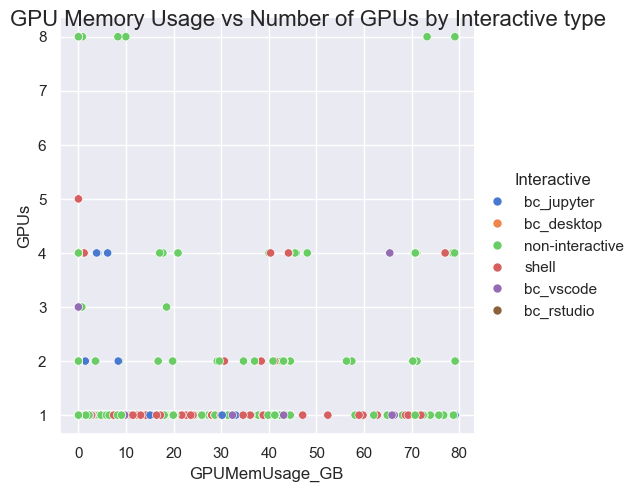

In [9]:
def do_pair_plot_colors(x: str, y: str, hue: str, title: str, mask=None, legend=True) -> None:
    if mask is None:
        mask = slice(None)
    plotting_df = pd.DataFrame(
        {
            x: df[x][mask],
            y: df[y][mask],
            hue: df[hue][mask],
        }
    )
    g = sns.relplot(data=plotting_df, x=x, y=y, hue=hue, kind="scatter", legend=legend)
    g.fig.suptitle(title, fontsize=16)


# test on GPUMemUsge vs GPUs group by Interactive
do_pair_plot_colors("GPUMemUsage_GB", "GPUs", "Interactive", "GPU Memory Usage vs Number of GPUs by Interactive type")

### GPUMemUsage (GB) vs allocated RAM

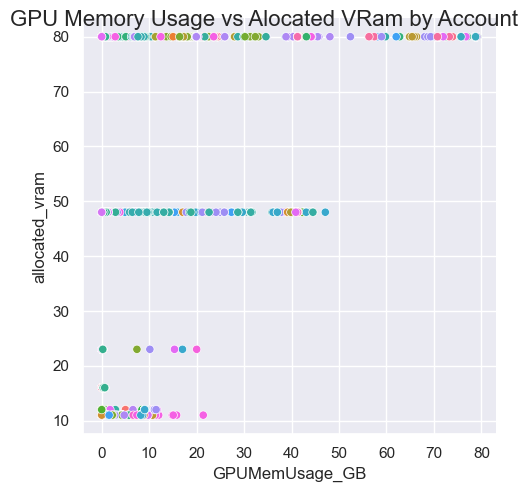

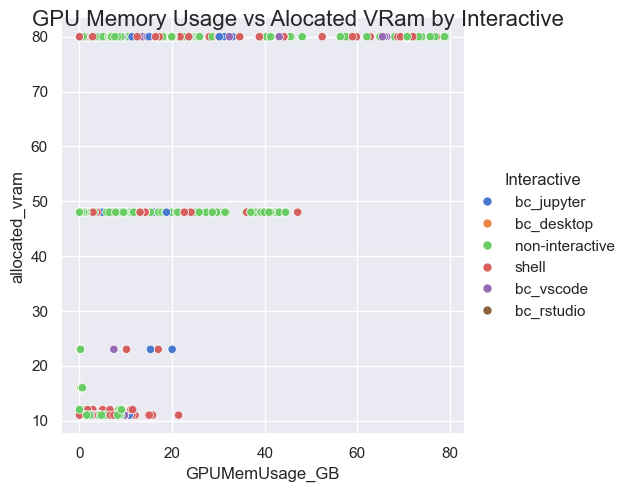

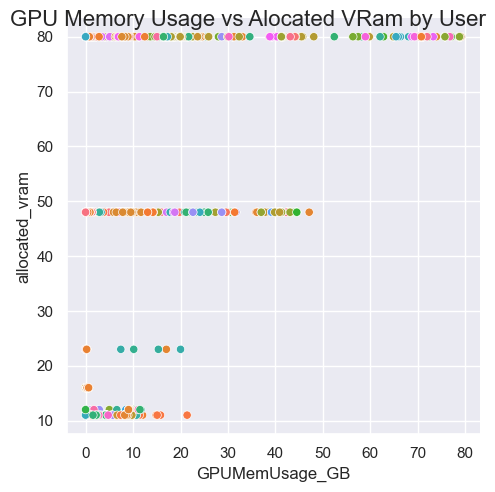

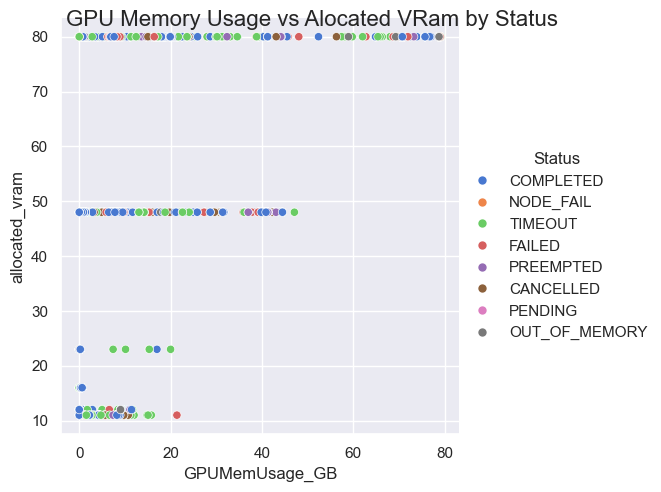

In [10]:
hue_array = ["Account", "Interactive", "User", "Status"]

for hue in hue_array:
    val = True
    if hue == "Account" or hue == "User":
        val = False
    do_pair_plot_colors(
        "GPUMemUsage_GB", "allocated_vram", hue, f"GPU Memory Usage vs Alocated VRam by {hue}", legend=val
    )

Database also contains requested vram and allocated vram

Possible lists of pair features to look into:
- GPUMemUsage & allocated vram
- allocated & requested vram
- GPUMemUsage & GPUComputeUsage
- GPUComputeUsage & CPUCompteUsage
- CPUMemUsage & GPUMemUsage
- Time Limit & Queue Time in hours, group by QOS

### Allocated & requested vram ###

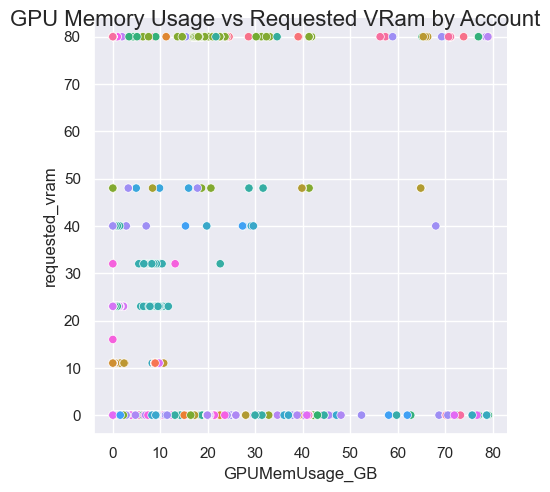

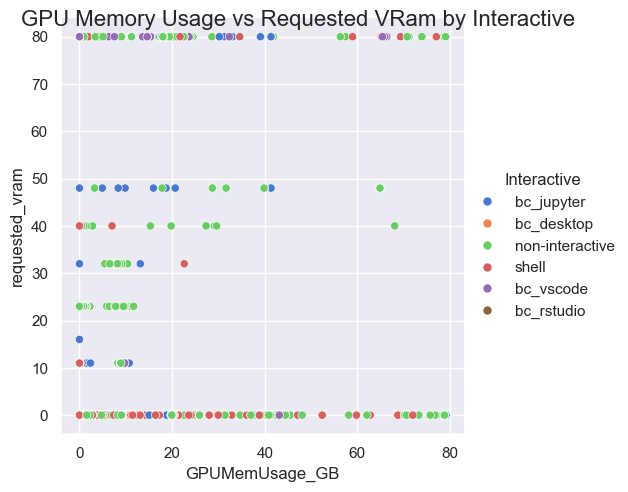

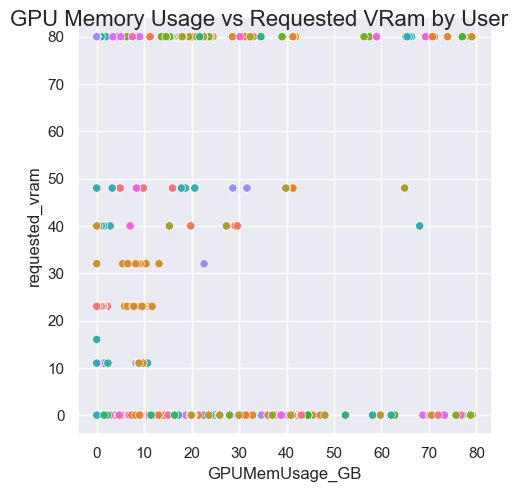

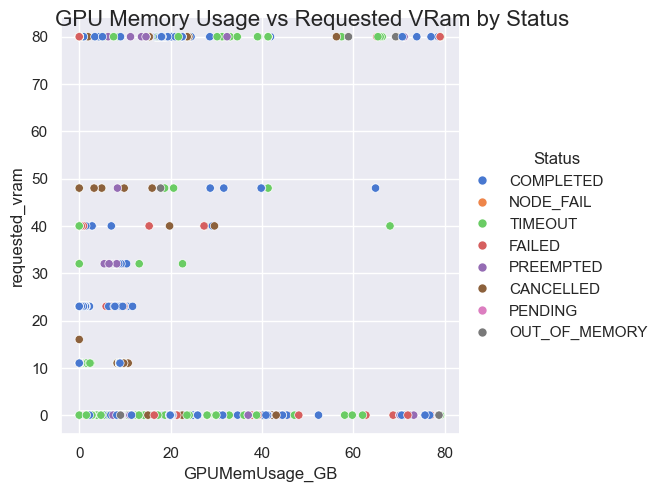

In [11]:
for hue in hue_array:
    val = True
    if hue == "Account" or hue == "User":
        val = False
    do_pair_plot_colors(
        "GPUMemUsage_GB", "requested_vram", hue, f"GPU Memory Usage vs Requested VRam by {hue}", legend=val
    )

### GPUMemUsage vs GPUComputeUsage ###

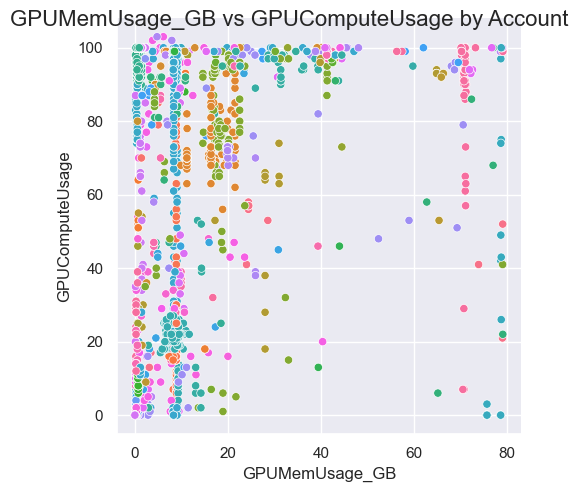

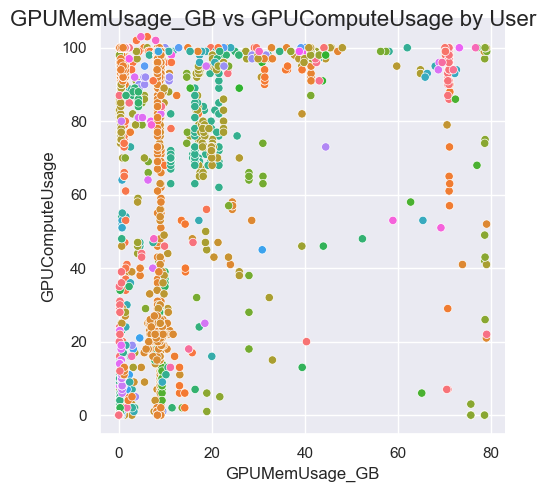

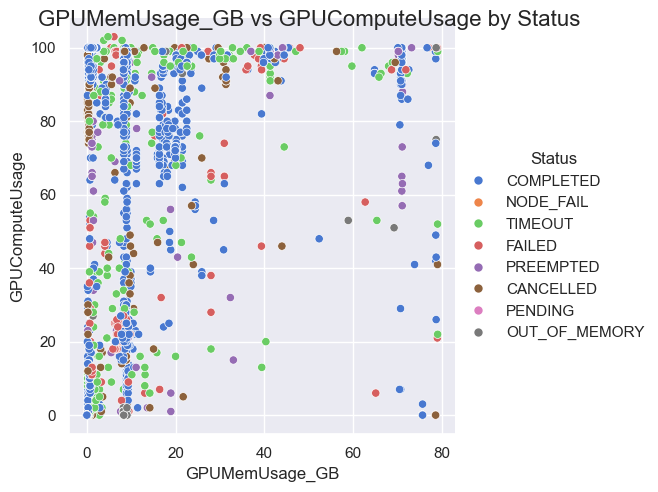

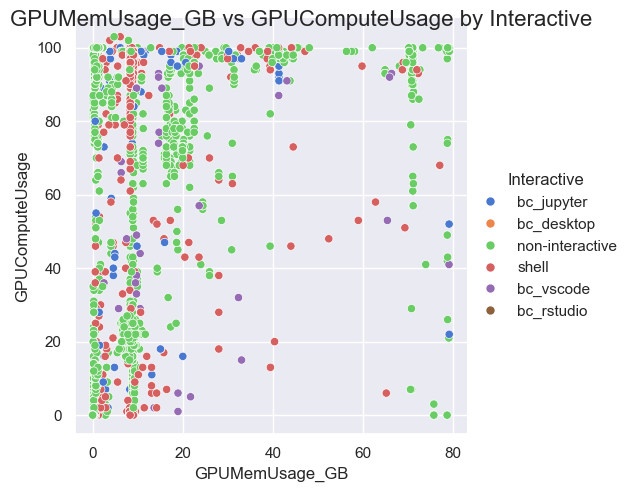

In [12]:
hue_array = ["Account", "User", "Status", "Interactive"]
for hue in hue_array:
    val = True
    if hue == "Account" or hue == "User":
        val = False
    do_pair_plot_colors(
        "GPUMemUsage_GB", "GPUComputeUsage", hue, f"GPUMemUsage_GB vs GPUComputeUsage by {hue}", legend=val
    )

### GPUComputeUsage vs CPUComputeUsage ###

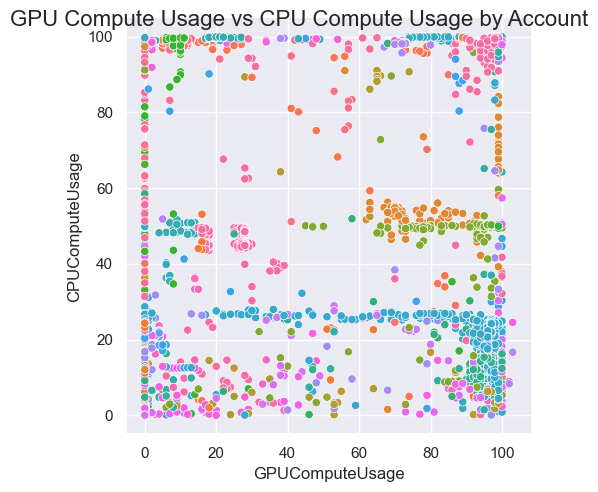

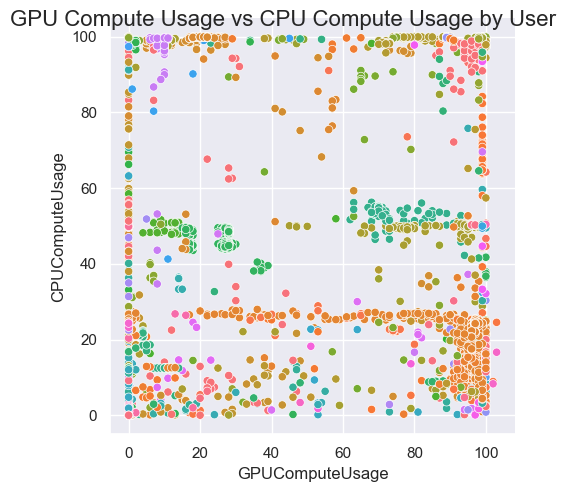

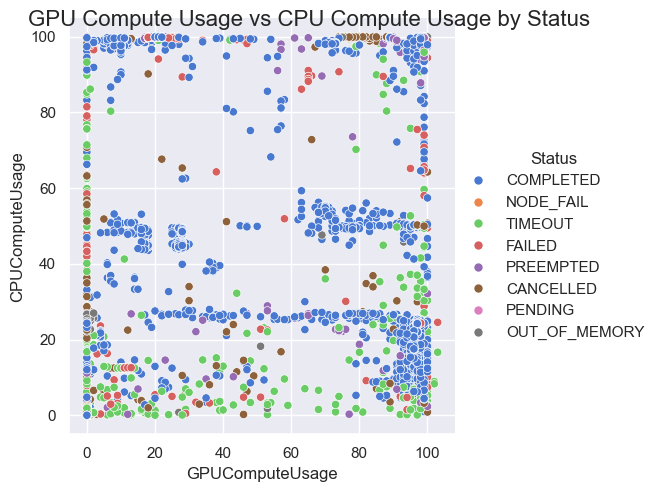

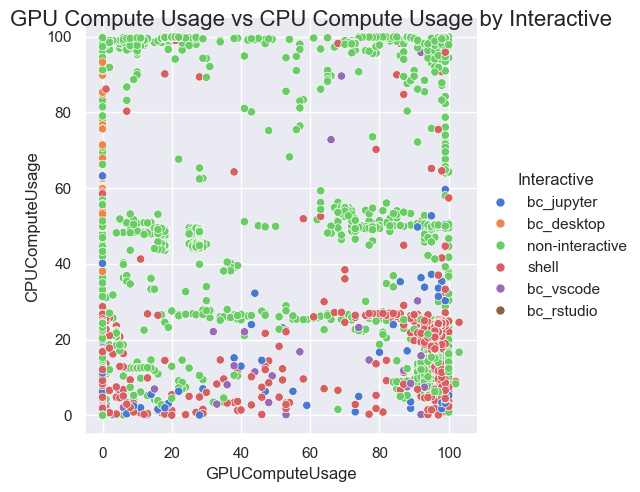

In [16]:
for hue in hue_array:
    val = True
    if hue == "Account" or hue == "User":
        val = False
    do_pair_plot_colors(
        "GPUComputeUsage", "CPUComputeUsage", hue, f"GPU Compute Usage vs CPU Compute Usage by {hue}", legend=val
    )

### GPUMemUsage vs CPUMemUsage ###

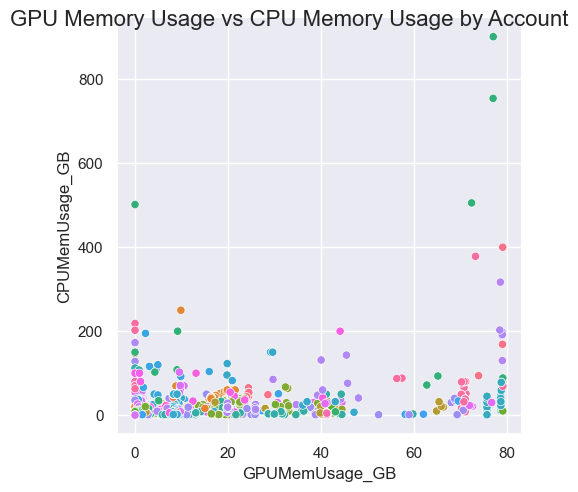

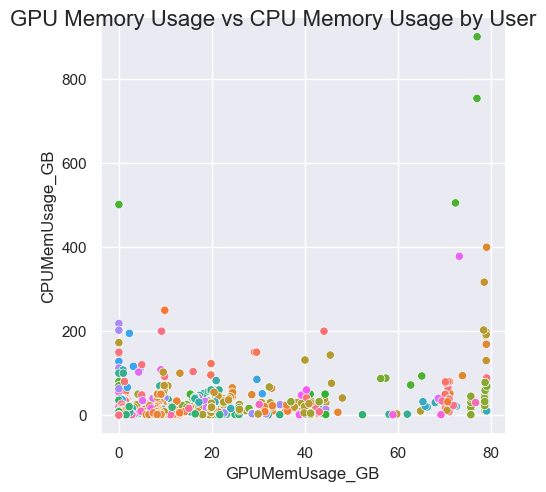

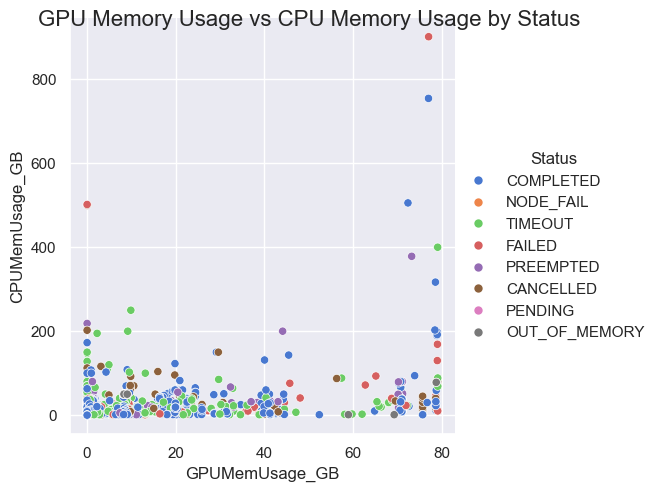

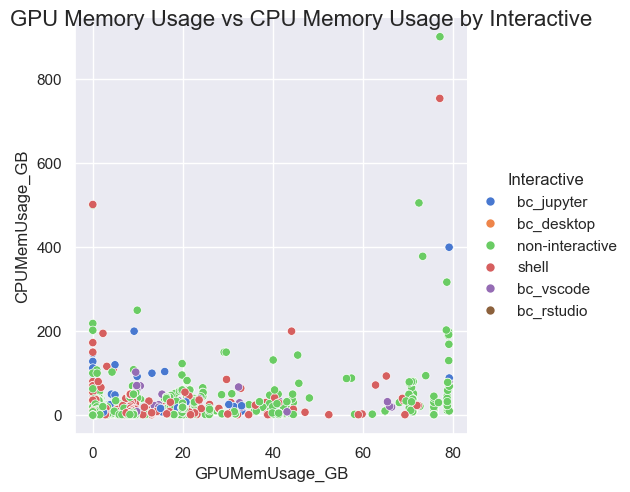

In [15]:
for hue in hue_array:
    val = True
    if hue == "Account" or hue == "User":
        val = False
    do_pair_plot_colors(
        "GPUMemUsage_GB", "CPUMemUsage_GB", hue, f"GPU Memory Usage vs CPU Memory Usage by {hue}", legend=val
    )

### Time Limit vs Queue Time ###

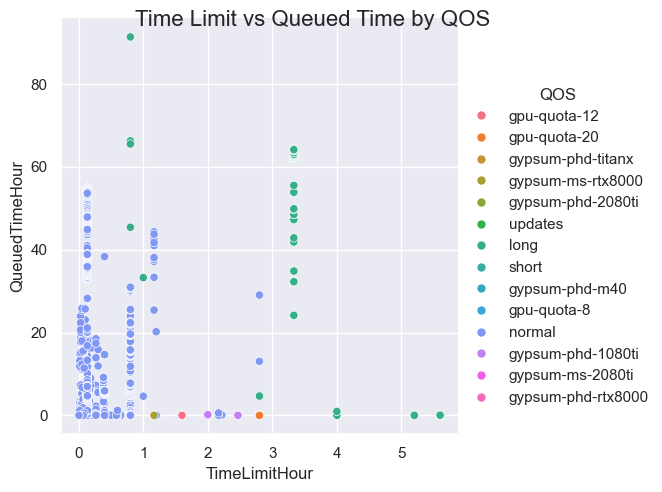

In [17]:
hue = "QOS"
df["TimeLimitHour"] = df["TimeLimit"].apply(lambda x: x.total_seconds() / 3600)
df["QueuedTimeHour"] = df["Queued"].apply(lambda x: x.total_seconds() / 3600)
do_pair_plot_colors("TimeLimitHour", "QueuedTimeHour", hue, f"Time Limit vs Queued Time by {hue}", legend=True)